In [1]:
import numpy as np
import matplotlib.pyplot as plt

def draw(S,H,regret_y_lim,average_y_lim,optimal_value,K,beta,num_path,algo_list):
    """using matplotlib to generate plots for given data of an environment
    """
    # load data
    reward_dict = {}
    average_dict = {}
    for algo in algo_list:
        reward_list = []
        average_list = []
        file = './riverswim_s_' + str(S) + '_h_' + str(H) + '/reward_'
        if algo == 'UCRL-WVTR':
            file += 'wvtr_4_'
        elif algo == 'UCRL-WVTR w/o HOME':
            file += 'wvtr_2_'
        elif algo == 'UCRL-VTR':
            file += 'wvtr_1_'
        elif algo == 'Random':
            file += 'random_'
        file += 'beta_' + str(beta) + '_'
        for ii in range(num_path):
            reward_episode = np.loadtxt(file+str(ii))[:K]
            reward_episode = np.cumsum(reward_episode)
            average_episode = reward_episode / np.arange(1, len(reward_episode)+1)
            reward_episode = np.cumsum(average_episode)
            reward_episode = np.concatenate(([0],reward_episode))
            reward_list.append(reward_episode.reshape(len(reward_episode), 1))
            average_list.append(average_episode.reshape(len(average_episode), 1))
        reward_dict[algo] = reward_list[0]
        average_dict[algo] = average_list[0]
        for ii in range(1, num_path):
            reward_dict[algo] = np.concatenate((reward_dict[algo], reward_list[ii]), axis = 1)
            average_dict[algo] = np.concatenate((average_dict[algo], average_list[ii]), axis = 1)

    reward_optimal = optimal_value * np.arange(K+1)

    plt.figure(figsize=(9, 6))
    for algo in algo_list:
        x = np.arange(K+1)
        reward = reward_dict[algo].mean(axis = 1)
        regret = reward_optimal - reward
        std = reward_dict[algo].std(axis = 1)
        plt.xlim([0, K])
        plt.ylim([0, regret_y_lim])
        plt.plot(x, regret, label=algo)
        plt.fill_between(x, regret - std, regret + std, alpha=0.2)
        plt.xlabel('Episode', fontsize = 20)
        plt.ylabel('Regret', fontsize = 20)
        plt.grid(linestyle=":")
        plt.legend(fontsize = 18, loc='upper left')
    plt.savefig('./figures/regret_s_' + str(S) + '_h_' + str(H) + '_beta_' + str(beta) + '.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.figure(figsize=(9, 6))
    for algo in algo_list:
        x = np.arange(K)
        average = average_dict[algo].mean(axis = 1)
        std = average_dict[algo].std(axis = 1)
        plt.xlim([0, K])
        plt.ylim([0, average_y_lim])
        plt.plot(x, average, label=algo)
        plt.fill_between(x, average - std, average + std, alpha=0.2)
        plt.xlabel('Episode', fontsize = 20)
        plt.ylabel('Average Rewards', fontsize = 20)
        plt.grid(linestyle=":")
        plt.legend(fontsize = 18, loc='lower left')
    plt.savefig('./figures/average_s_' + str(S) + '_h_' + str(H) + '_beta_' + str(beta) + '.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()

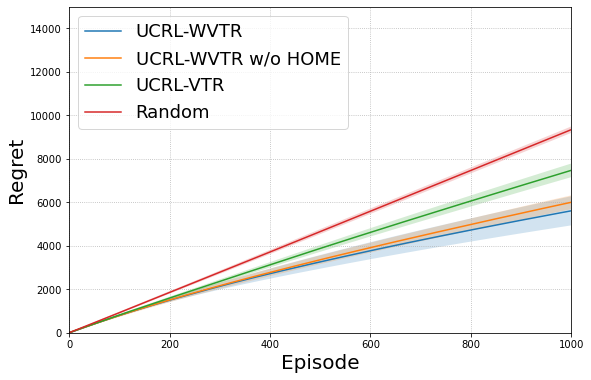

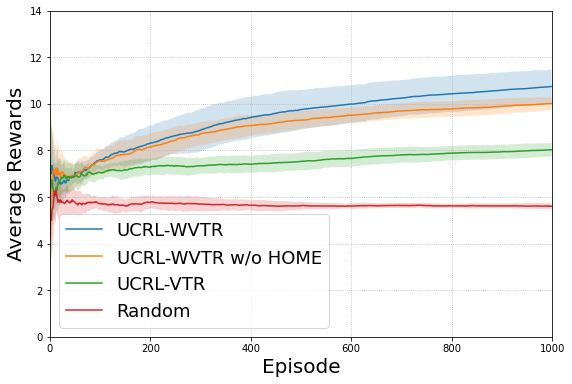

In [2]:
S, H = 6, 100
regret_y_lim = 15000
average_y_lim = 14
optimal_value = 15
K = 1000
beta = 1
num_path = 10
algo_list = ['UCRL-WVTR', 'UCRL-WVTR w/o HOME', 'UCRL-VTR', 'Random']

draw(S,H,regret_y_lim,average_y_lim,optimal_value,K,beta,num_path,algo_list)

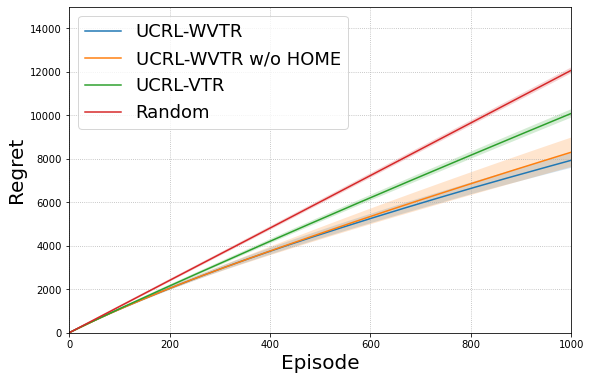

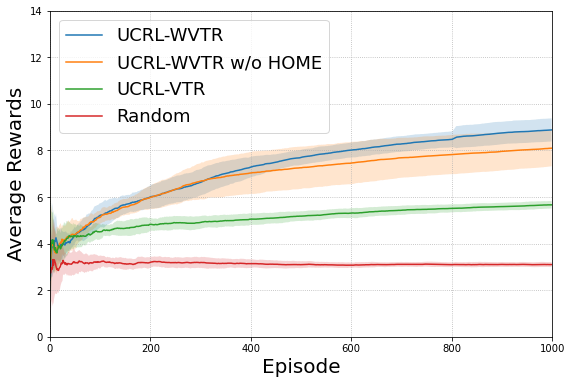

In [6]:
S, H = 8, 100
regret_y_lim = 15000
average_y_lim = 14
optimal_value = 15.2
K = 1000
beta = 1
num_path = 10
algo_list = ['UCRL-WVTR', 'UCRL-WVTR w/o HOME', 'UCRL-VTR', 'Random']

draw(S,H,regret_y_lim,average_y_lim,optimal_value,K,beta,num_path,algo_list)

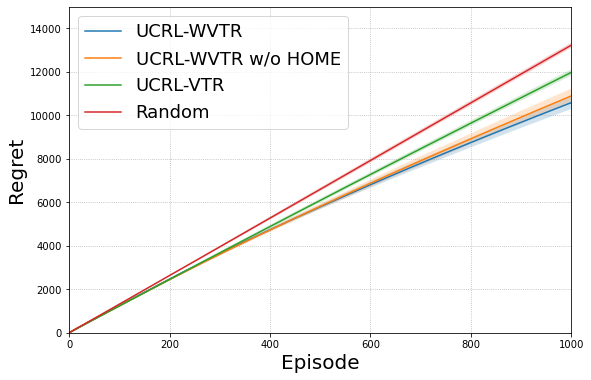

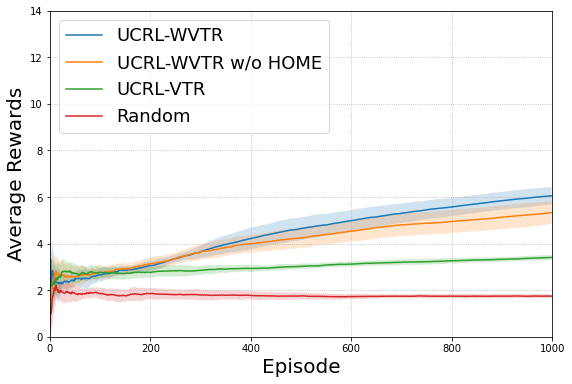

In [7]:
S, H = 10, 100
regret_y_lim = 15000
average_y_lim = 14
optimal_value = 15
K = 1000
beta = 2
num_path = 10
algo_list = ['UCRL-WVTR', 'UCRL-WVTR w/o HOME', 'UCRL-VTR', 'Random']

draw(S,H,regret_y_lim,average_y_lim,optimal_value,K,beta,num_path,algo_list)